In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
url = ("/content/cars.csv")
df = pd.read_csv(url)
df.head()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207


In [ ]:
categorical_var = df.select_dtypes(include=['object','category']).columns
numerical_var = df.select_dtypes(include=['number']).columns
print("Categorical variable :",len(categorical_var))
print(list(categorical_var))
print("Numerical variable :",len(numerical_var))
print(list(categorical_var))

Categorical variable : 8
['Engine Information.Driveline', 'Engine Information.Engine Type', 'Engine Information.Transmission', 'Fuel Information.Fuel Type', 'Identification.Classification', 'Identification.ID', 'Identification.Make', 'Identification.Model Year']
Numerical variable : 9
['Engine Information.Driveline', 'Engine Information.Engine Type', 'Engine Information.Transmission', 'Fuel Information.Fuel Type', 'Identification.Classification', 'Identification.ID', 'Identification.Make', 'Identification.Model Year']


In [ ]:
print(df.shape)
rows , columns = df.shape
print("rows : ",rows)
print("columns: ",columns)

(5076, 18)
rows :  5076
columns:  18


In [ ]:
instances = df.shape[0]
print("Number of instances :",instances)

Number of instances : 5076


In [ ]:
duplicate = df.duplicated().sum()
print(duplicate)


18


In [ ]:
df = df.drop_duplicates()

# Correlation Heatmap

A correlation heatmap visually represents relationships between numeric variables, with colors indicating the strength and direction of correlations. The correlation coefficient ranges from -1 (perfect negative) to 1 (perfect positive), and 0 means no correlation. Strong correlations are shown with darker colors, helping to identify patterns or multicollinearity.

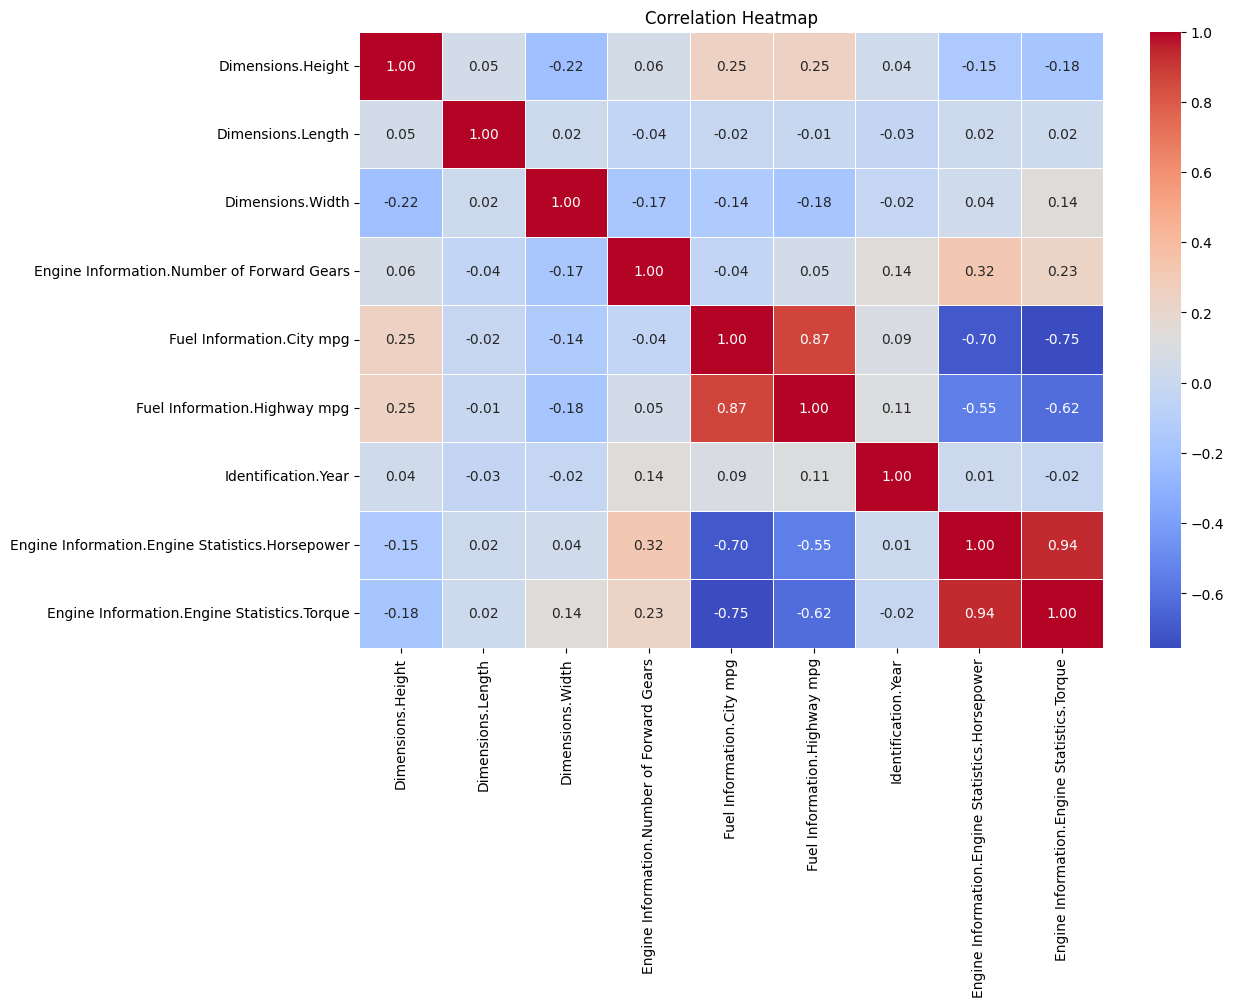

In [40]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])


plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [46]:
target = "Fuel Information.City mpg"
selected_features = ["Fuel Information.Highway mpg","Dimensions.Height", "Dimensions.Length", "Dimensions.Width"]


# VARIANCE INFLATION FACTOR

VIF (Variance Inflation Factor) measures how much the variance of a regression coefficient is inflated due to multicollinearity with other features. A high VIF (typically greater than 10) indicates that a feature is highly correlated with others, which can distort the model. Removing features with high VIF helps improve model stability and performance.

In [44]:

# VIF Calculation
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data
X = numeric_df[selected_features]
y = numeric_df[target]

# Remove high VIF features (VIF < 10) AND Calculate VIF
vif_data = calculate_vif(X)
X = X[vif_data[vif_data["VIF"] < 10]["Feature"]]
vif_data = calculate_vif(X)
print(vif_data)

                        Feature       VIF
0  Fuel Information.Highway mpg  8.375205
1             Dimensions.Height  6.254327
2             Dimensions.Length  3.420696
3              Dimensions.Width  3.250047


# FEATURE SCALING

Feature scaling standardizes the range of independent variables (features) in a dataset. It helps models like linear regression, k-NN, and neural networks perform better, as they rely on distance metrics or gradients. Common methods include:

Standardization (Z-score normalization): Transforms features to have a mean of 0 and a standard deviation of 1, making them comparable.
Min-Max Scaling: Scales features to a specific range (usually 0 to 1).
Feature scaling improves model stability, ensures equal weight for all features, and helps convergence in optimization algorithms.

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#FEATURE SCALING
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
#OUTLIER REMOVAL
Q1 = np.percentile(X_train_scaled, 25, axis=0)
Q3 = np.percentile(X_train_scaled, 75, axis=0)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


mask = np.all((X_train_scaled >= lower_bound) & (X_train_scaled <= upper_bound), axis=1)

X_train_clean = X_train_scaled[mask]
y_train_clean = y_train.iloc[mask]

model = Ridge(alpha=0.1)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

model_clean = Ridge(alpha=0.1)
model_clean.fit(X_train_clean, y_train_clean)
y_pred_clean = model_clean.predict(X_test_scaled)

# Function to Evaluate Models
def evaluate_model(y_true, y_pred, title="Model Evaluation"):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"\n{title}:")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R-squared: {r2:.3f}")

evaluate_model(y_test, y_pred, "Model Evaluation Before Outlier Removal")
evaluate_model(y_test, y_pred_clean, "Model Evaluation After Outlier Removal")


Model Evaluation Before Outlier Removal:
MAE: 1.22
MSE: 2.69
RMSE: 1.64
R-squared: 0.867

Model Evaluation After Outlier Removal:
MAE: 0.97
MSE: 1.75
RMSE: 1.32
R-squared: 0.914
